## ASSIGNMENT 2 - VIP

**Group 07 - The Parallelepipeds**


##### Filter images and detect edges - implement, perform & evaluate

**WORK FLOW**

**1) Get image**



    For each sigma value:

**2) Compute/apply Gaussian filtering**
Compare images across sigma values and explain in detail what can be seen

**3) Compute gradient magnitude**
corresponds to first derivative of the Gaussian - G(x), G(y)
Get images for ech sigma and explain in detail what can be seen and how the results differ

**4) Compute Laplacian-Gaussian filtering**
Corresponds to the second derivative of the Gausian. 
Compare images across sigmas and explain in detail what can be seen and how the results differ

**5) Apply Canny (or similar) edge detection**



*Describe the parameter values and their impact on the result. Select what you think is a set of good parameter values, apply, show and decribe the result*

In [68]:
#packages
import numpy as np 
import cv2
import matplotlib.pyplot as plt

sigma = [1,2,4,8]
kernel_size = 3 

In [69]:
img = cv2.imread('mandrill.jpg', cv2.IMREAD_GRAYSCALE)  #includes greyscaling

#cv2.imshow('image', img) #creates GUI
#cv2.waitKey(0)
#cv2.destroyAllWindows()

In [ ]:
# plotting
def plot_LoG(edges, sigma_values, title="LoG"):
    plt.figure(figsize=(12, 8))
    plt.suptitle(title)
    plt.subplot(2, 3, 1)
    plt.imshow(img, cmap='gray')
    plt.title("Original")
    plt.axis("off")

    for i, sigma in enumerate(sigma_values, start=2):
        plt.subplot(2, 3, i)
        plt.imshow(edges[sigma], cmap='gray')
        plt.title(f"LoG (σ={sigma})")
        plt.axis("off")

    plt.tight_layout()
    plt.show()

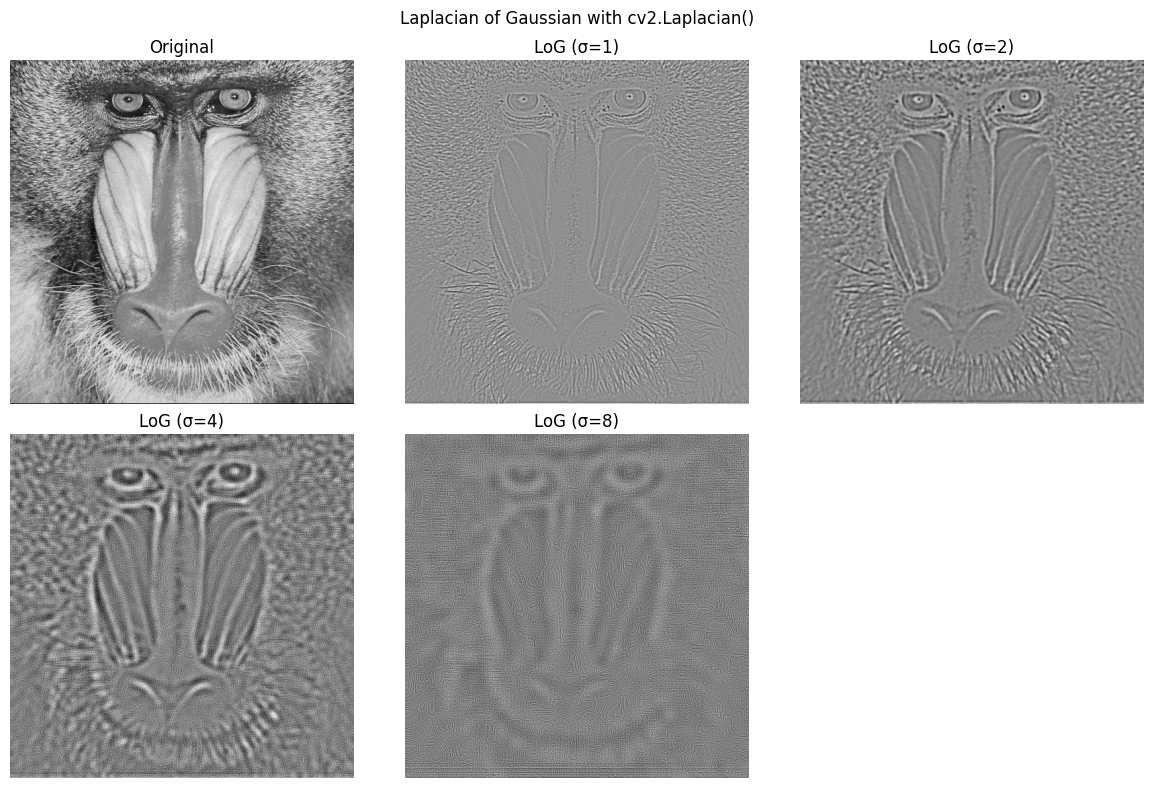

In [ ]:
def LoG_opencv(img, sigma_values, kernel_size): 
    """Laplacian of Gaussian with cv2.Laplacian()"""

    results = {}
    for s in sigma_values:
        
        # Apply Gaussian blur to image with current sigma
        blurred = cv2.GaussianBlur(img, (0, 0), sigmaX=s, sigmaY=s)

        # Laplacian operator 
        lap = cv2.Laplacian(blurred, cv2.CV_32F, ksize=kernel_size)
        
        results[s] = lap

    return results


LoG_imgs = LoG_opencv(img, sigma, kernel_size)
plot_LoG(LoG_imgs, sigma, "Laplacian of Gaussian with cv2.Laplacian()")


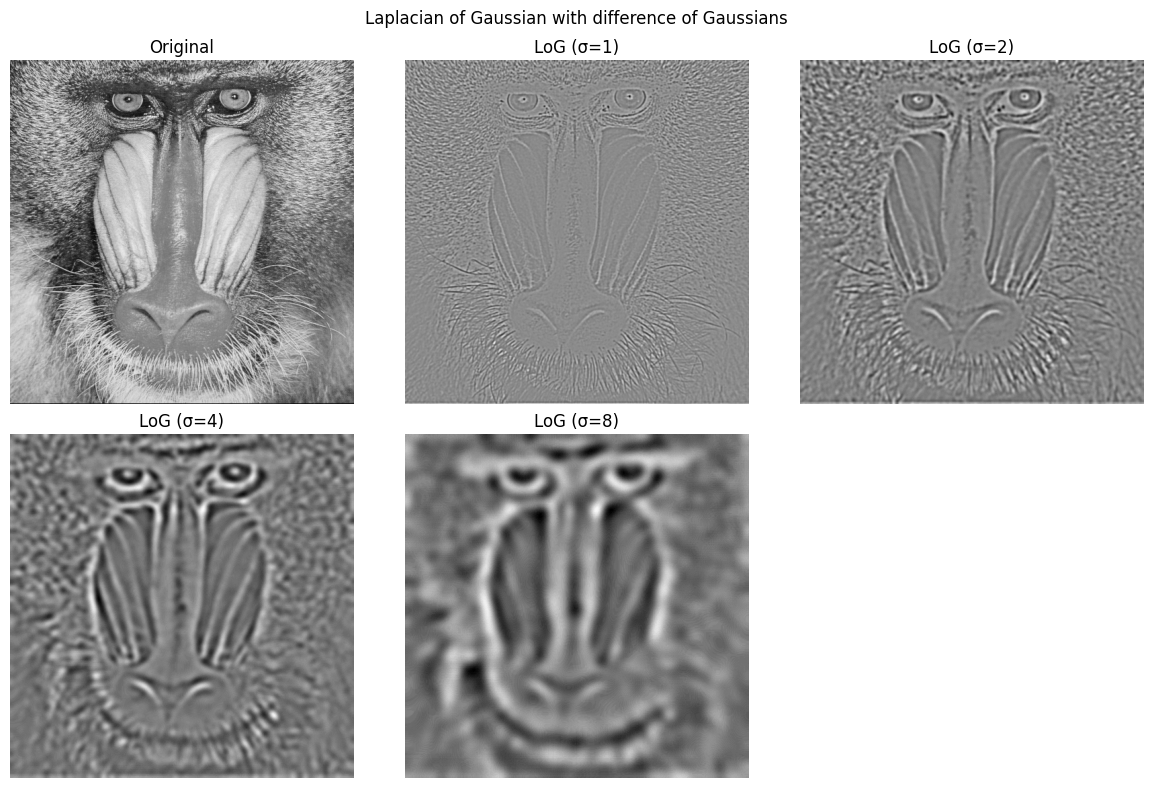

In [103]:
def LoG_with_DoG(img, sigma_values, k=1.6): # k = 1.6 seems to be a standard choice for this 
    """Laplacian of Gaussian with difference of Gaussians"""

    results = {}

    for s in sigma_values:
        
        # Apply Gaussian blur to image with current sigma
        blurred = cv2.GaussianBlur(img, (0, 0), sigmaX=s, sigmaY=s)
        # Apply Gaussian blur to image with current sigma * k
        k_blurred = cv2.GaussianBlur(img, (0, 0), sigmaX=k*s, sigmaY=k*s)
        # Convert to float and compute the difference of Gaussians
        gDiff = cv2.subtract(k_blurred.astype(np.float32), blurred.astype(np.float32)) 

        results[s] = gDiff

    return results


LoG_with_DoG_imgs = LoG_with_DoG(img, sigma)
plot_LoG(LoG_with_DoG_imgs, sigma, "Laplacian of Gaussian with difference of Gaussians")
